In [9]:
import glob
import os
import sys
from pathlib import Path

import numpy as np
import torch

# 当前目录
current_dir = os.path.dirname(os.path.abspath("__file__"))
# 上一级目录
parent_dir = os.path.abspath(os.path.join(current_dir, ".."))
sys.path.append(parent_dir)
# 上两级目录
grandparent_dir = os.path.abspath(os.path.join(parent_dir, ".."))
sys.path.append(grandparent_dir)

from config_plot import *
from data import get_data
from network import PINN
from utils import (
    Logger,
    count_parameters,
    from_pickle,
    load_network,
    read_config_file,
    set_random_seed,
    tensors_to_numpy,
    to_pickle,
)

In [10]:
import scipy.io

# config

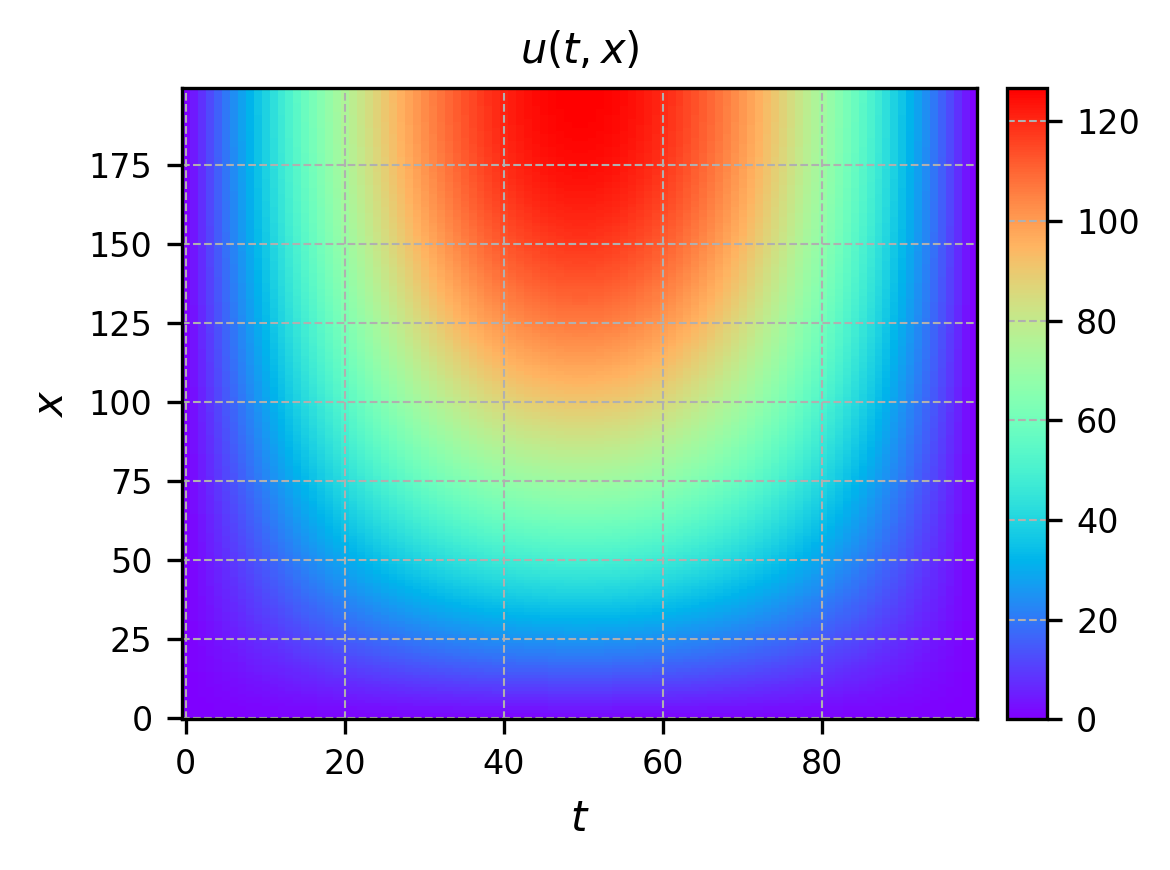

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 定义问题参数
L = 10.0  # 空间范围
T = 5.0   # 时间范围
Nx = 100  # 空间网格点数
Nt = 200  # 时间步数
c = 1.0   # 波速

# 空间和时间网格
x = np.linspace(0, L, Nx)
t = np.linspace(0, T, Nt)
dx = x[1] - x[0]
dt = t[1] - t[0]

# 初始化位移场 u
u = np.zeros((Nx, Nt))

# 设置初始条件
u[:,0] = np.sin(np.pi * x / L)  # 例如，一个正弦波

# 使用有限差分方法求解PDE
for n in range(Nt - 1):
    for i in range(1, Nx - 1):
        u[i, n + 1] = 2 * u[i, n] - u[i, n - 1] + (c ** 2) * (dt ** 2) / (dx ** 2) * (u[i + 1, n] - 2 * u[i, n] + u[i - 1, n])


/home/lbu/anaconda3/envs/py396/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35299 (\N{CJK UNIFIED IDEOGRAPH-89E3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lbu/anaconda3/envs/py396/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lbu/anaconda3/envs/py396/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31243 (\N{CJK UNIFIED IDEOGRAPH-7A0B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lbu/anaconda3/envs/py396/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/lbu/anaconda3/envs/py396/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIF

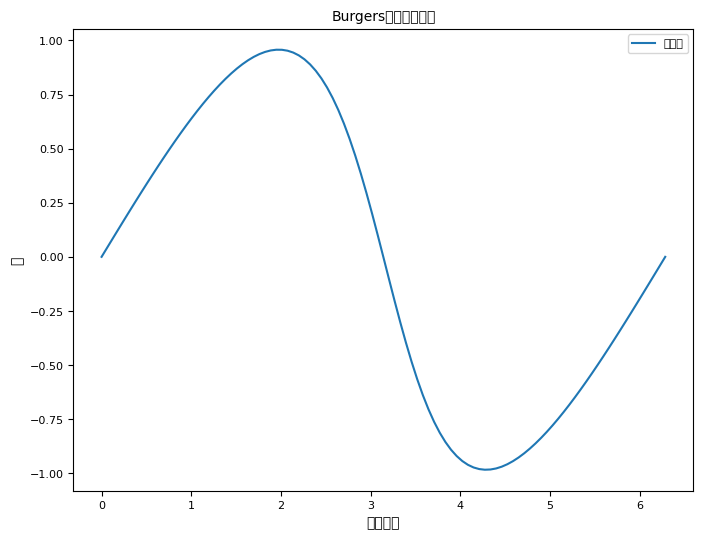

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 定义Burgers方程
def burgers_equation(u, dx, dt, nu, nt):
    for n in range(nt):
        un = u.copy()
        for i in range(1, nx - 1):
            u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i - 1]) + nu * dt / dx**2 * (un[i + 1] - 2 * un[i] + un[i - 1])
    return u

# 参数设置
nx = 101  # 空间网格数
dx = 2 * np.pi / (nx - 1)  # 空间步长
nu = 0.07  # 粘性系数
nt = 100  # 时间步数
dt = dx * nu  # 时间步长
x = np.linspace(0, 2 * np.pi, nx)  # 空间坐标

# 初始条件
u = np.sin(x)  # 初始解

# 求解Burgers方程
u = burgers_equation(u, dx, dt, nu, nt)

# 绘制结果
plt.figure(figsize=(8, 6))
plt.plot(x, u, label='数值解')
plt.xlabel('空间坐标')
plt.ylabel('解')
plt.title('Burgers方程的数值解')
plt.legend()
plt.grid()
plt.show()